# OIL AND NATURAL GAS STATISTICAL OVERVIEW AND PREDICTION

#### Prepared BY: Avinash Tripathi
##### Course: ALY 6140

In [ ]:
#-----------------------------------------------libraries imported---------------------------------------------------- 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import missingno as msno
#!{sys.executable} -m pip install scikit-learn
import statsmodels.api as sm
warnings.filterwarnings('ignore') 
import itertools
plt.style.use('fivethirtyeight')

## Dataset Description :

The data file for information pertaining to annual oil and gas production is released on or about July 1st each year following the legislatively mandated six month period of confidentiality. The NY state Division offers production data via the searchable online database with production histories from 1985 forward and in zipped comma-separated values files from 2002 forward. However, the data set that we are currently using contains annual production information of oil and gas wells in New York State from 2001 to 2019. It is publicly available and can be downloaded from the following link https://data.ny.gov/api/views/mxea-iw3u/rows.csv?accessType=DOWNLOAD

## Goal of the project :
There is a constant debate on if the oil and gas prices are affecting each other. In Investopedia's article wriiten by  TIM SMITH and updated on Jan 22, 2021, we have found that between 2003 and 2008, there was an evident positive correlation between the two commodities—ranging from 0.25 to >0.65. Through this Notebook we are trying to analyse 
- 1) if the production of oil and gas during that period were also correlated or not? 
- 2) What could be the possible future trends for the production of oil and gas?

#### Process : 
- We will begin the project by analsysing the trends shown over the past 20 years in the oil and gas commodities. Drill down to understand the correlation between both commodities. From there, we will take a sample of the data between reporting year 2003- 2008 to see if the data show significant correlation or not when comapred with the prices of those 2 commodities. We will also have a look on the possible future trends of both the comodities and provide suggestion on whether it is advisable to invest in those sectors or not.  

##### References:
- Downloadable Oil & Gas Production Data - NYS Dept. of Environmental Conservation. (2021). Retrieved 3 July 2021, from https://www.dec.ny.gov/energy/36159.html
- York, S. (2021). Oil and Gas Annual Production: Beginning 2001 - CKAN. Retrieved 3 July 2021, from https://catalog.data.gov/dataset/oil-and-gas-annual-production-beginning-2001
- Do Oil and Natural Gas Prices Rise and Fall Together?. (2021). Retrieved 3 July 2021, from https://www.investopedia.com/articles/active-trading/032515/do-oil-and-natural-gas-prices-rise-and-fall-together.asp

In [2]:
data = pd.read_csv('https://data.ny.gov/api/views/mxea-iw3u/rows.csv?accessType=DOWNLOAD')
#data = pd.read_csv("/Users/avinashtripathi/Downloads/Oil_and_Gas_Annual_Production__Beginning_2001 (2).csv")
data.head(10)

,API Well Number,County,Company Name,API Hole Number,Sidetrack Code,Completion Code,Well Type Code,Production Field,Well Status Code,Well Name,Town,Producing Formation,Months in Production,"Gas Produced, Mcf","Water Produced, bbl","Oil Produced, bbl",Reporting Year,New Georeferenced Column
0,31003676590000,Allegany,Collins Oil Co.,67659.0,0.0,0.0,OD,Richburg,IN,Coats 2,Wirt,Richburg,6.0,NaN,NaN,3.0,2004,"Wirt, NY\n(42.137408, -78.150594)"
1,31029192220000,Erie,Empire Energy E&P LLC,19222.0,0.0,0.0,GD,Sardinia,AC,"Tuczapski, J 1",Sardinia,Medina,10.0,602.0,0.0,0.0,2018,"Sardinia, NY\n(42.541044, -78.508184)"
2,31003663790000,Allegany,"Crooks, John C",66379.0,0.0,0.0,OD,Richburg,IN,Childs 38,Genesee,Richburg,0.0,0.0,0.0,0.0,2018,"Genesee, NY\n(42.02693, -78.205893)"
3,31003635950000,Allegany,J and R Oil Co.,63595.0,0.0,0.0,OD,Scio,IN,Harris - 010,Ward,Scio,0.0,0.0,0.0,0.0,2001,"Ward, NY\n(42.225739, -77.898903)"
4,31003678170000,Allegany,Iron Dinosaur Oil,67817.0,0.0,0.0,OD,Browning,IN,Browning 13a,Scio,Scio,0.0,0.0,NaN,0.0,2004,"Scio, NY\n(42.171429, -77.97865)"
5,31009659320000,Cattaraugus,"A C Oil, LLC",65932.0,0.0,0.0,OD,Chipmunk,AC,Lauser 4,Allegany,Chipmunk,12.0,1.0,0.0,10.0,2018,"Allegany, NY\n(42.088061, -78.491258)"
6,31121136660000,Wyoming,"Kelly, Michael A.",13666.0,0.0,0.0,GD,Leicester,IN,Kelly 1,Perry,Medina,12.0,NaN,NaN,NaN,2004,"Perry, NY\n(42.719701, -78.000751)"
7,31003678110000,Allegany,Iron Dinosaur Oil,67811.0,0.0,0.0,OD,Browning,IN,Browning fo7,Scio,Scio,0.0,0.0,NaN,0.0,2004,"Scio, NY\n(42.171429, -77.97865)"
8,31009110670000,Cattaraugus,Empire Energy E&P LLC,11067.0,0.0,0.0,GE,Lakeshore,AC,"Hill, T&M 3",Otto,Medina,12.0,495.0,0.0,0.0,2018,"Otto, NY\n(42.35589, -78.832619)"
9,31003677820000,Allegany,Iron Dinosaur Oil,67782.0,0.0,0.0,OD,Browning,IN,Browning 9,Scio,Scio,0.0,NaN,0.0,0.0,2007,"Scio, NY\n(42.171429, -77.97865)"


Data was entered by Division staff or received in an electronic format. All oil and gas wells reported by a company are included in the file. Each row in the dataset is an individual well; wells are sorted by operator, then county, town, field, and formation. Files are in .csv format with the following fields:

###   - Production File Metadata :
| Field Name | Explanation | 
| --- | --- | 
| Stretched | Gaussian |  
| API Well Number | 14-Digit API well number |
| County | Name of the county where the well is located | 
| Company Name | Name of the company operating the well | 
| API Hole Number | 5-Digit number identifying the wellbore |
| Sidetrack Code | 2-Digit sidetrack identifying code |
| Completion Code |	2-Digit completion identifying code |
|Well Type Code | Type of well |
|Production Field | Name of the oil or gas field that the well produces from |
| Well Status Code | Status of the well during the production year |
| Well Name	| Name of the well |
| Town | Town where the is located |
| Producing Formation | Formation from which the well produces oil or gas |
| Months in Production | Months that the well was in production for reporting year |
| Gas Produced, Mcf | produced from the well during the production year |
| Water Produced, bbl | produced from the well during the production year |
| Oil Produced, bbl | produced from the well during the production year |
| Reporting Year | Production year being reported |

#### 1) What is bbl and Mcf?
- E&P companies measure oil production in barrels. One barrel, usually abbreviated as bbl, is equal to 42 U.S. gallons.
- Similarly, convention for oil, the term mcf means 1 million cubic feet of gas.

#### 2) What do you actually mean by Gas and Oil?
- When we talk about gas, it is about natural gas and when we talk about oil we are considering Crude oil or petroleum 
- Most U.S. natural gas use is for heating and generating electricity, but some consuming sectors have other uses for natural gas. The electric power sector uses natural gas to generate electricity and produce useful thermal output.M
- Petroleum is majorly used to produce gasoline, apart form that also be used to make heating oil, diesel fuel, jet fuel, and propane. It is also used to make many common household products, including crayons, dishwashing liquids, deodorant, eyeglasses, tires, and ammonia.

##### References: 
- Fossil Energy Study Guide: Oil (2021). Retrieved 3 July 2021, from https://www.energy.gov/sites/prod/files/2013

In [3]:
#Understandnig the overall structure of data, and find columns which have inapproriate format or have null values 
print("The shape of data is :\n",data.shape)
print("---------------------------------------------------------------------------------------------------------------------")
print("The columns in the dataset are :\n", list(data.columns.values))
print("---------------------------------------------------------------------------------------------------------------------")
print("Describing the data :\n",data.describe())
print("---------------------------------------------------------------------------------------------------------------------")
print("Identify columns having NULL values and their datatype:")
print(data.info())

The shape of data is :
 (252005, 18)
---------------------------------------------------------------------------------------------------------------------
The columns in the dataset are :
 ['API Well Number', 'County', 'Company Name', 'API Hole Number', 'Sidetrack Code', 'Completion Code', 'Well Type Code', 'Production Field', 'Well Status Code', 'Well Name', 'Town', 'Producing Formation', 'Months in Production', 'Gas Produced, Mcf', 'Water Produced, bbl', 'Oil Produced, bbl', 'Reporting Year', 'New Georeferenced Column']
---------------------------------------------------------------------------------------------------------------------
Describing the data :
        API Well Number  API Hole Number  Sidetrack Code  Completion Code  \
count     2.520050e+05    251993.000000   251993.000000    251993.000000   
mean      3.102008e+13     27532.384820        0.007377         0.015215   
std       2.601841e+10     19894.593013        0.098990         0.131321   
min       3.100300e+13     

In [4]:
#-----------------------------------------------PREPROCESSING---------------------------------------------------------
#Dropping unimportant feature 
#data = data.drop(['Sidetrack Code', 'Completion Code'], axis=1)
print(data.shape)
print("-------------------------------------------------------------------------------------------------------------")

#Converting Column into their respective datatypes 
pd.to_datetime(data["Reporting Year"], format='%Y')
print(data.info())

(252005, 18)
-------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252005 entries, 0 to 252004
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   API Well Number           252005 non-null  int64  
 1   County                    251993 non-null  object 
 2   Company Name              252004 non-null  object 
 3   API Hole Number           251993 non-null  float64
 4   Sidetrack Code            251993 non-null  float64
 5   Completion Code           251993 non-null  float64
 6   Well Type Code            252005 non-null  object 
 7   Production Field          251872 non-null  object 
 8   Well Status Code          251993 non-null  object 
 9   Well Name                 251992 non-null  object 
 10  Town                      251844 non-null  object 
 11  Producing Formation       252003 

AxesSubplot(0.08,0.07;0.784255x0.81)


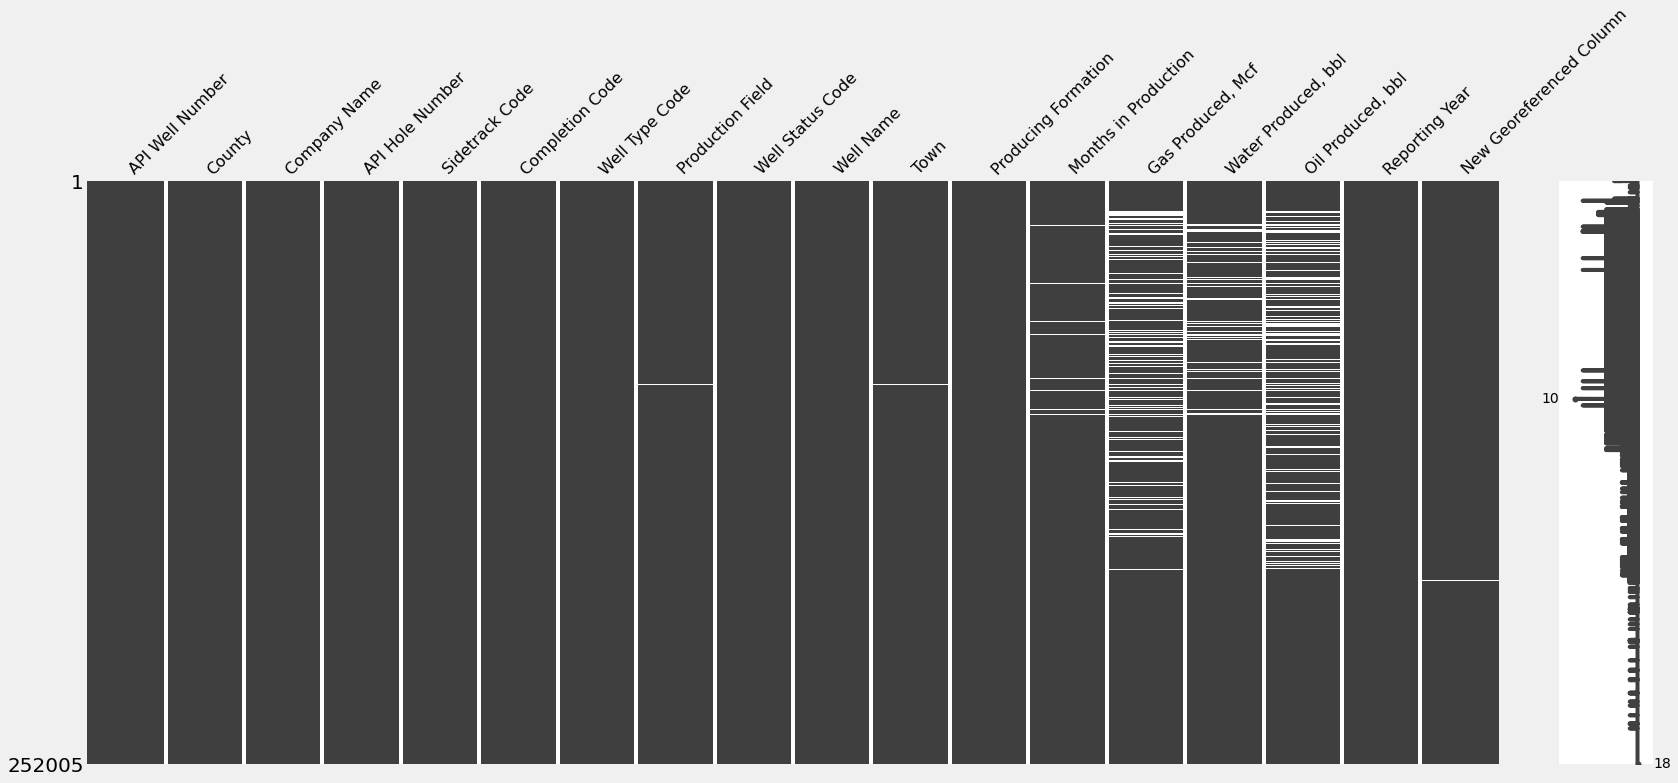

In [5]:
#visualize missing columns
print(msno.matrix(data))

In [6]:
#Most of the columns are having NULL values - Maximum number of missing entries found in [Gas Produced, Mcf] | [Water Produced, bbl] | [Oil Produced, bbl]    
#a) dropping null records for columns which has least effect on end goal 
data = data.dropna(subset=['County', 'Company Name', 'API Hole Number', 'Production Field', 'Well Status Code', 'Well Name', 'Town', 'Producing Formation']) 
#b) filling NULL values in columns [Months in Production] | [Gas Produced, Mcf] | [Water Produced, bbl] | [Oil Produced, bbl]
#data = data.fillna()
mean_gas=data['Gas Produced, Mcf'].mean()
mean_water=data['Water Produced, bbl'].mean()
mean_oil=data['Oil Produced, bbl'].mean()
data["Gas Produced, Mcf"].fillna( value =mean_gas, inplace = True)
data["Water Produced, bbl"].fillna( value =mean_water, inplace = True)
data["Oil Produced, bbl"].fillna( value =mean_oil, inplace = True)
data["Months in Production"].fillna( method ='ffill', inplace = True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251818 entries, 0 to 252004
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   API Well Number           251818 non-null  int64  
 1   County                    251818 non-null  object 
 2   Company Name              251818 non-null  object 
 3   API Hole Number           251818 non-null  float64
 4   Sidetrack Code            251818 non-null  float64
 5   Completion Code           251818 non-null  float64
 6   Well Type Code            251818 non-null  object 
 7   Production Field          251818 non-null  object 
 8   Well Status Code          251818 non-null  object 
 9   Well Name                 251818 non-null  object 
 10  Town                      251818 non-null  object 
 11  Producing Formation       251818 non-null  object 
 12  Months in Production      251818 non-null  float64
 13  Gas Produced, Mcf         251818 non-null  f

In [7]:
#converting columns into right datatype 
data['Reporting Year'] = pd.to_datetime(data['Reporting Year'], format='%Y')
data['API Hole Number'] = pd.to_numeric(data['API Hole Number'])
print(data.info())
print(data.head)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251818 entries, 0 to 252004
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   API Well Number           251818 non-null  int64         
 1   County                    251818 non-null  object        
 2   Company Name              251818 non-null  object        
 3   API Hole Number           251818 non-null  float64       
 4   Sidetrack Code            251818 non-null  float64       
 5   Completion Code           251818 non-null  float64       
 6   Well Type Code            251818 non-null  object        
 7   Production Field          251818 non-null  object        
 8   Well Status Code          251818 non-null  object        
 9   Well Name                 251818 non-null  object        
 10  Town                      251818 non-null  object        
 11  Producing Formation       251818 non-null  object        
 12  Mo

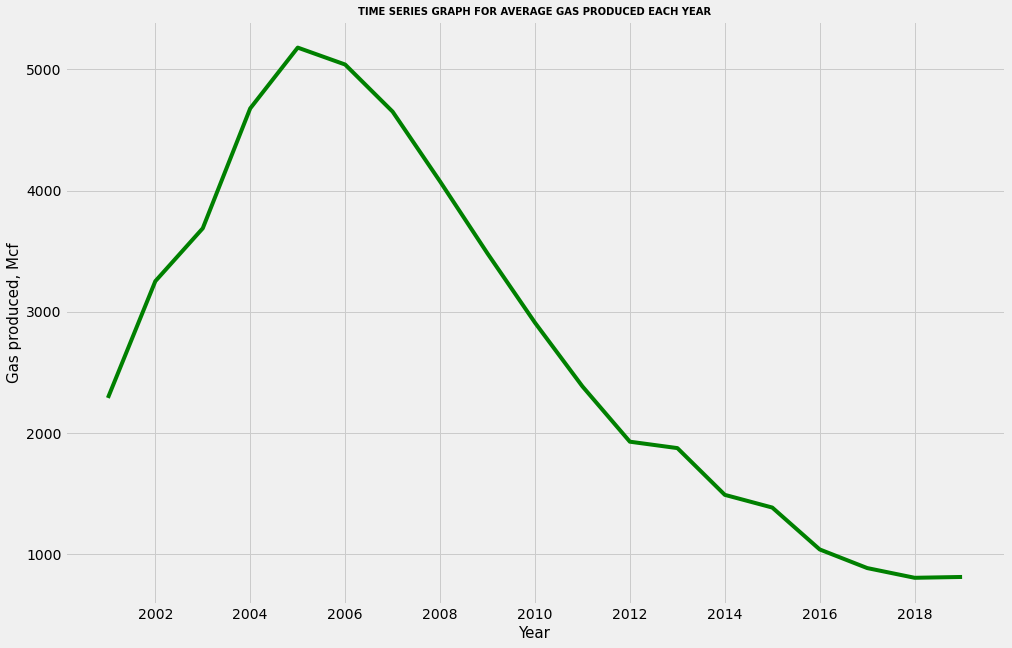

In [8]:
#------------------------------------------DATA VISUALIZATION----------------------------------------------
eda_frame=data.groupby('Reporting Year').agg({'Gas Produced, Mcf':'mean'}).reset_index()
plt.figure(figsize=[15,10])
plt.plot(list(eda_frame['Reporting Year']),eda_frame['Gas Produced, Mcf'],color='green')
plt.title('TIME SERIES GRAPH FOR AVERAGE GAS PRODUCED EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Gas produced, Mcf',fontsize = 15)
plt.show()

Annual production peaked at almost 56 billion cubic feet in 2006, less than 0.3% of the nation’s total for the year. In 2018, New York produced less than 12 billion cubic feet of natural gas, and the state holds less than 0.03% of the nation’s total natural gas reserves. Similar trend can be seen in the above graph

Reference:
- New York - State Energy Profile Analysis - U.S. Energy Information Administration (EIA). (2021). Retrieved 3 July 2021, from https://www.eia.gov/state/analysis.php?sid=NY


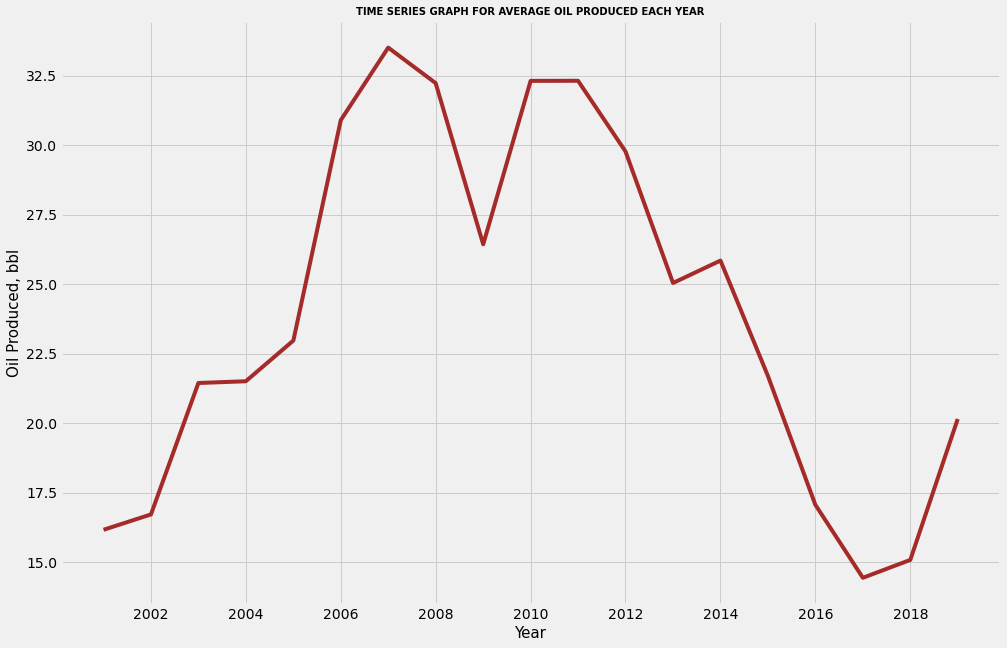

In [9]:
eda_frame=data.groupby('Reporting Year').agg({'Oil Produced, bbl':'mean'}).reset_index()
plt.figure(figsize=[15,10])
plt.plot(list(eda_frame['Reporting Year']),eda_frame['Oil Produced, bbl'],color='brown')
plt.title('TIME SERIES GRAPH FOR AVERAGE OIL PRODUCED EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Oil Produced, bbl',fontsize = 15)
plt.show()

New York is one of the nation’s largest petroleum consumers, but the state consumes less petroleum per capita than any other state.

Text(0, 0.5, 'Gas produced')

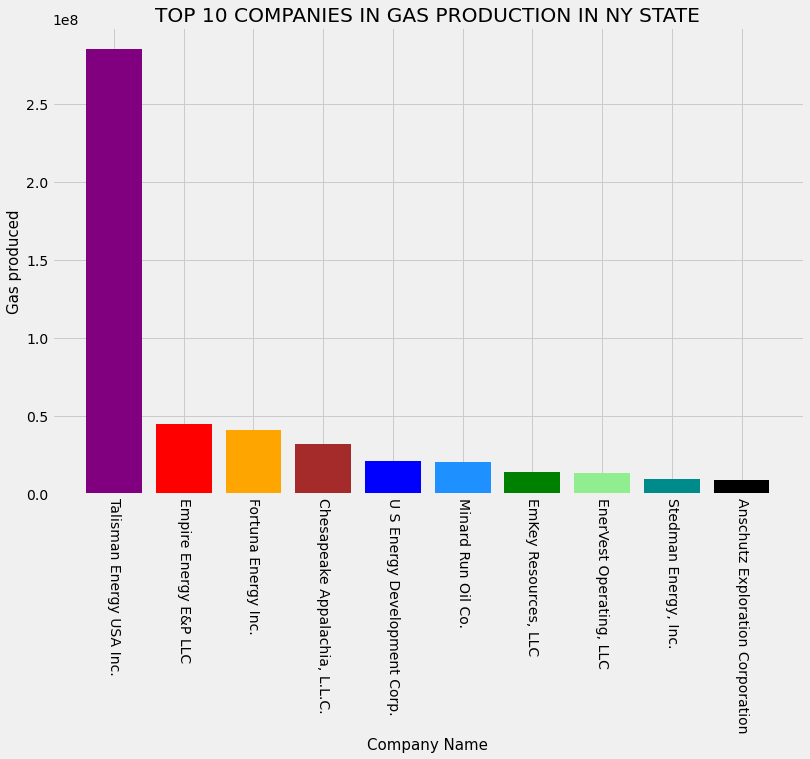

In [10]:
bargraph=data.groupby('Company Name').agg({'Gas Produced, Mcf':'sum'}).reset_index()
bargraph=bargraph.sort_values('Gas Produced, Mcf', ascending=False)
bargraph=bargraph.head(10)
bargraph
plt.figure(figsize=(12,8))
customPalette = ['purple','red','orange','brown','blue','dodgerblue','green','lightgreen','darkcyan', 'black']
#bargraph.plot(kind='bar',title='count vs. complaint types',color=customPalette)
plt.bar(bargraph['Company Name'],bargraph['Gas Produced, Mcf'],color=customPalette)
plt.xticks(rotation=-90)
#plt.gca.axis
plt.title("TOP 10 COMPANIES IN GAS PRODUCTION IN NY STATE")
plt.xlabel('Company Name',fontsize = 15)
plt.ylabel('Gas produced',fontsize = 15)
#plt.legend(fontsize=12,loc=4)

Text(0, 0.5, 'Oil Produced in bbl')

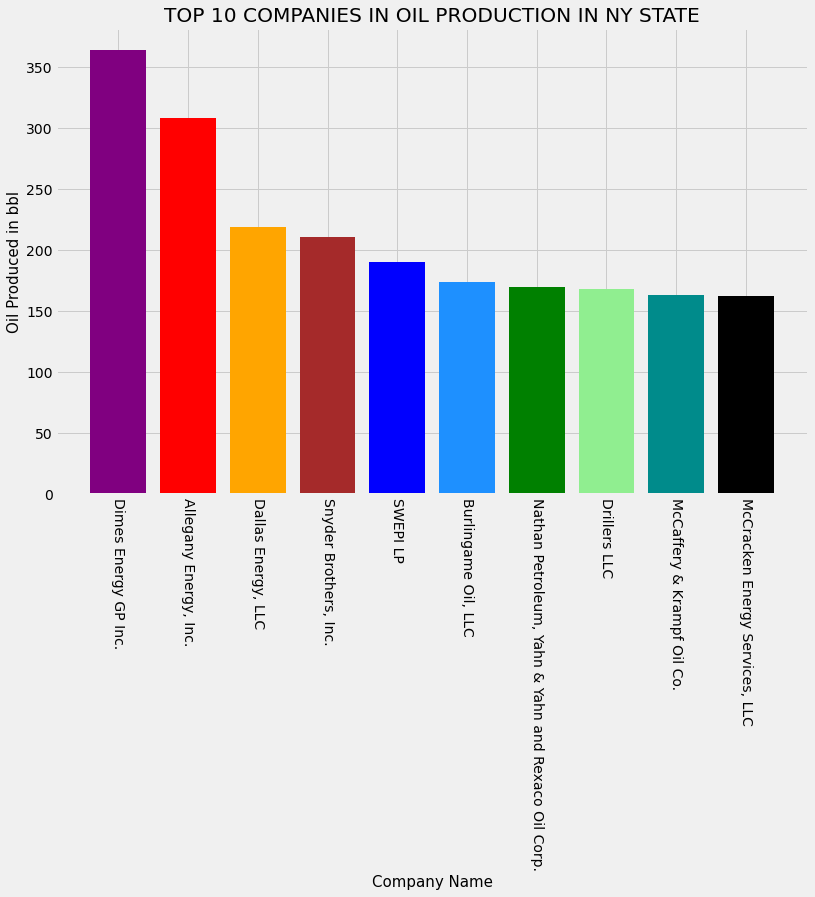

In [11]:
bargraph2=data.groupby('Company Name').agg({'Oil Produced, bbl':'mean'}).reset_index()
bargraph2=bargraph2.sort_values('Oil Produced, bbl', ascending=False)
bargraph2=bargraph2.head(10)
bargraph2
plt.figure(figsize=(12,8))
customPalette = ['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black']
# bargraph.plot(kind='bar',title='count vs. complaint types',color=customPalette)
plt.bar(bargraph2['Company Name'],bargraph2['Oil Produced, bbl'],color=customPalette)
plt.xticks(rotation=-90)
#plt.gca.axis
plt.title("TOP 10 COMPANIES IN OIL PRODUCTION IN NY STATE")
plt.xlabel('Company Name',fontsize = 15)
plt.ylabel('Oil Produced in bbl',fontsize = 15)
#plt.legend(fontsize=12,loc=4)

In [12]:
#There are total 62 counties in NY state. However, Only 32 counties are responsible for Oil and Gas production 
len(data['County'].unique())

32

Text(0, 0.5, 'Gas produced')

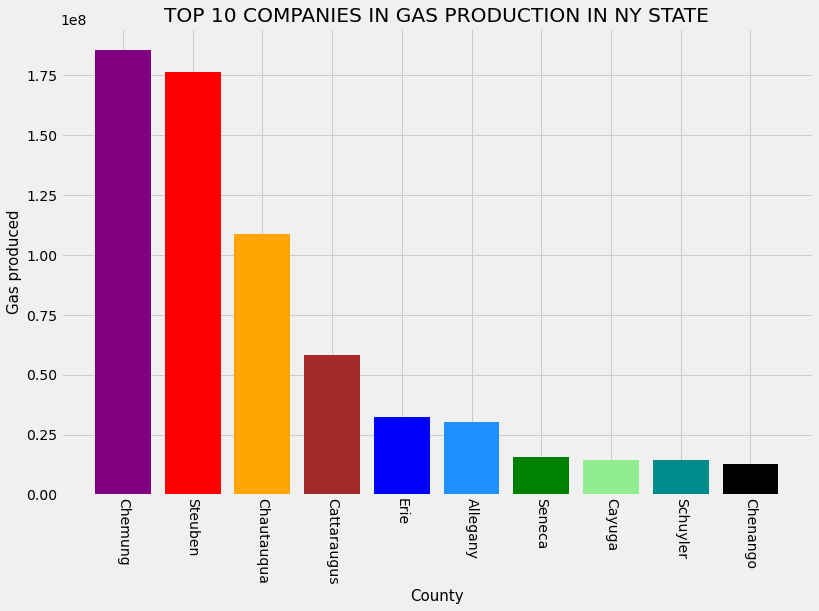

In [13]:
bargraph3=data.groupby('County').agg({'Gas Produced, Mcf':'sum'}).reset_index()
bargraph3=bargraph3.sort_values('Gas Produced, Mcf', ascending=False)
bargraph3=bargraph3.head(10)
bargraph3
plt.figure(figsize=(12,8))
customPalette = ['purple','red','orange','brown','blue','dodgerblue','green','lightgreen','darkcyan', 'black']
#bargraph.plot(kind='bar',title='count vs. complaint types',color=customPalette)
plt.bar(bargraph3['County'],bargraph3['Gas Produced, Mcf'],color=customPalette)
plt.xticks(rotation=-90)
#plt.gca.axis
plt.title("TOP 10 COMPANIES IN GAS PRODUCTION IN NY STATE")
plt.xlabel('County',fontsize = 15)
plt.ylabel('Gas produced',fontsize = 15)
#plt.legend(fontsize=12,loc=4)

While the total production of Gas in NY Chemung county is maximum over the period 2000- 2018. We found out that as of 2019, chemung is ranked as #5 in the NY state Gas production and Number #7 in Oil Production.

Reference : https://www.shalexp.com/new-york/chemung-county


Text(0, 0.5, 'Oil Produced, bbl')

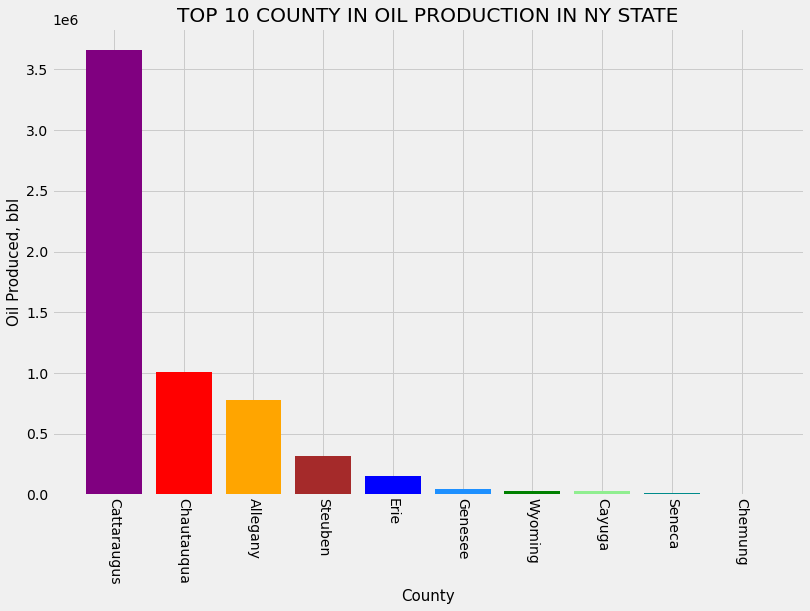

In [14]:
bargraph3=data.groupby('County').agg({'Oil Produced, bbl':'sum'}).reset_index()
bargraph3=bargraph3.sort_values('Oil Produced, bbl', ascending=False)
bargraph3=bargraph3.head(10)
bargraph3
plt.figure(figsize=(12,8))
customPalette = ['purple','red','orange','brown','blue','dodgerblue','green','lightgreen','darkcyan', 'black']
#bargraph.plot(kind='bar',title='count vs. complaint types',color=customPalette)
plt.bar(bargraph3['County'],bargraph3['Oil Produced, bbl'],color=customPalette)
plt.xticks(rotation=-90)
#plt.gca.axis
plt.title("TOP 10 COUNTY IN OIL PRODUCTION IN NY STATE")
plt.xlabel('County',fontsize = 15)
plt.ylabel('Oil Produced, bbl',fontsize = 15)
#plt.legend(fontsize=12,loc=4)

In [15]:
#------------------------------------------STATISTICAL ANALYSIS-------------------------------------------------------
subset_data = data.loc[(data['Reporting Year'] >= '2003-01-01') & (data['Reporting Year'] < '2009-01-01')]

In [16]:
subset_data['Reporting Year'].describe() 

count                   78126
unique                      6
top       2008-01-01 00:00:00
freq                    13811
first     2003-01-01 00:00:00
last      2008-01-01 00:00:00
Name: Reporting Year, dtype: object

,API Well Number,API Hole Number,Sidetrack Code,Completion Code,Months in Production,"Gas Produced, Mcf","Water Produced, bbl","Oil Produced, bbl"
API Well Number,1.000000,-0.254343,0.104009,0.026892,0.050264,0.062185,0.001887,-0.020612
API Hole Number,-0.254343,1.000000,-0.014015,-0.019882,-0.193416,-0.008194,-0.016042,-0.043878
Sidetrack Code,0.104009,-0.014015,1.000000,0.038502,-0.022835,0.083858,0.061901,-0.008011
Completion Code,0.026892,-0.019882,0.038502,1.000000,-0.012474,-0.002401,0.035638,0.026264
Months in Production,0.050264,-0.193416,-0.022835,-0.012474,1.000000,0.011781,0.013480,0.037816
"Gas Produced, Mcf",0.062185,-0.008194,0.083858,-0.002401,0.011781,1.000000,0.117691,-0.005515
"Water Produced, bbl",0.001887,-0.016042,0.061901,0.035638,0.013480,0.117691,1.000000,0.010115
"Oil Produced, bbl",-0.020612,-0.043878,-0.008011,0.026264,0.037816,-0.005515,0.010115,1.000000


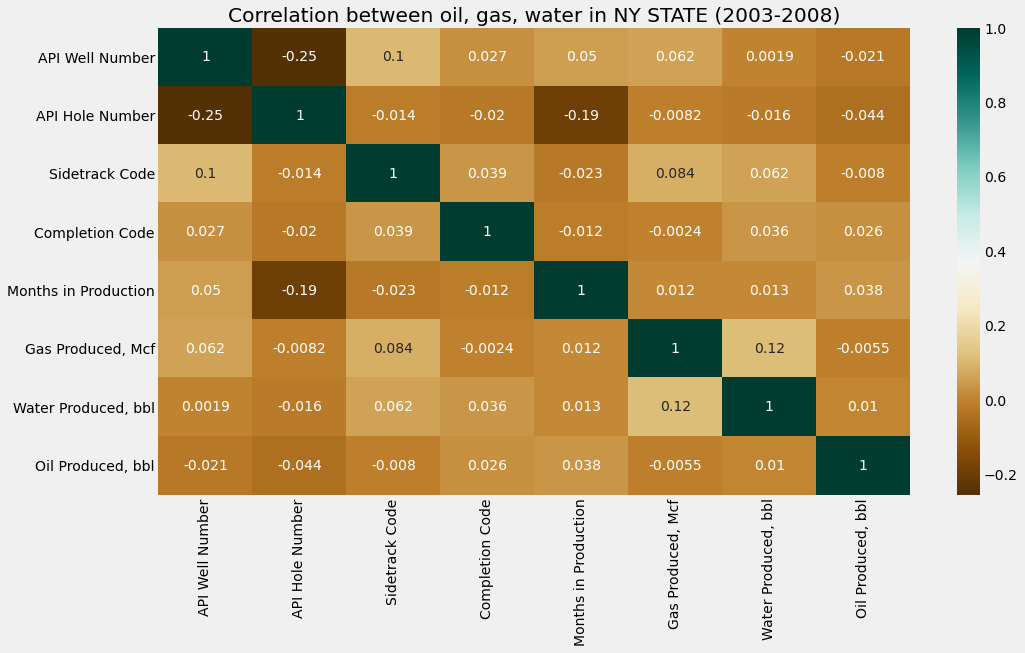

In [17]:
plt.figure(figsize=(15,8))
plt.title("Correlation between oil, gas, water in NY STATE (2003-2008)")
c= subset_data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

##### Fig. Description: As you can see from the above chart that there is Negative Correlation between Oil and Gas prodcution between the year 2003-2008. However, There is an intresting trend observed the production of Gas and water are seems to be somewhat correlated.

In [18]:
correlation = data['Gas Produced, Mcf'].corr(data['Oil Produced, bbl'])
print(" FOR NY state, Correlation value between Gas and Oil are coming as Negative:", correlation)

 FOR NY state, Correlation value between Gas and Oil are coming as Negative: -0.005514723516771455


<AxesSubplot:title={'center':'Correlation between oil, gas, water in NY STATE'}>

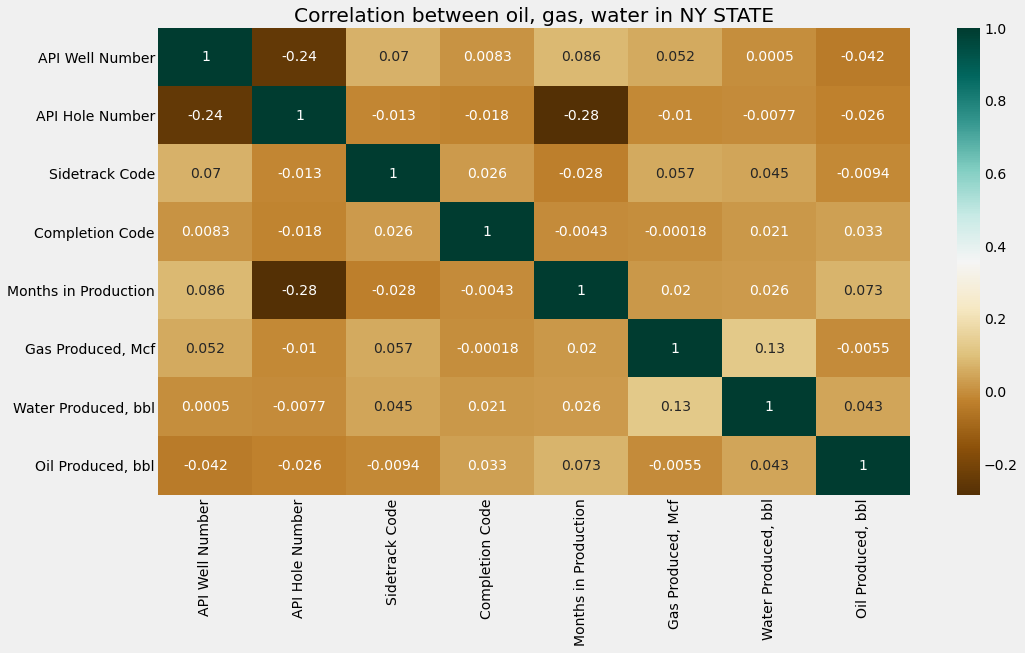

In [19]:
#let's see how the correlation when considered the overall period 2000 - 2018:
plt.figure(figsize=(15,8))
plt.title("Correlation between oil, gas, water in NY STATE")
c= data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

# PREDICTIVE ANALYSIS
- We though of implementing ARIMA model since we are measuring events that happen over a period of time. The model is used to understand past data or predict future data in a series. It’s used when a metric is recorded in regular intervals, from fractions of a second to daily, weekly or monthly periods. we have data granularity set as YEarly. hence we will see how our model perform over the period of 20 years and compare the predicted value with the actual value to validate our finding and prove the model's efficieny. 

## Time series forecasting of (Oil Production) in NY STATE using ARIMA model

In [20]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [21]:
data_timeseries = data.groupby('Reporting Year')['Oil Produced, bbl'].sum().reset_index()
data_timeseries = data_timeseries.set_index('Reporting Year')
data_timeseries.index

DatetimeIndex(['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Reporting Year', freq=None)

In [22]:
#Data y is having Null values since we are resampling the data using 6M  
y = data_timeseries['Oil Produced, bbl'].resample('6M').mean()

In [23]:
#adding some seasonality into the data that we had 
#since we were getting error as Length of endogenous variable must be larger the the number of lags used
y = y.fillna(method='ffill')

In [30]:
y

Reporting Year
2001-01-31    211296.763204
2001-07-31    211296.763204
2002-01-31    208434.298071
2002-07-31    208434.298071
2003-01-31    276021.534785
2003-07-31    276021.534785
2004-01-31    270939.077961
2004-07-31    270939.077961
2005-01-31    291817.258879
2005-07-31    291817.258879
2006-01-31    400087.706222
2006-07-31    400087.706222
2007-01-31    442111.966095
2007-07-31    442111.966095
2008-01-31    445122.331976
2008-07-31    445122.331976
2009-01-31    364605.762863
2009-07-31    364605.762863
2010-01-31    449754.719476
2010-07-31    449754.719476
2011-01-31    455556.219265
2011-07-31    455556.219265
2012-01-31    415379.892725
2012-07-31    415379.892725
2013-01-31    313296.921467
2013-07-31    313296.921467
2014-01-31    355325.000000
2014-07-31    355325.000000
2015-01-31    279462.000000
2015-07-31    279462.000000
2016-01-31    220901.000000
2016-07-31    220901.000000
2017-01-31    192679.000000
2017-07-31    192679.000000
2018-01-31    199054.000000
2018-

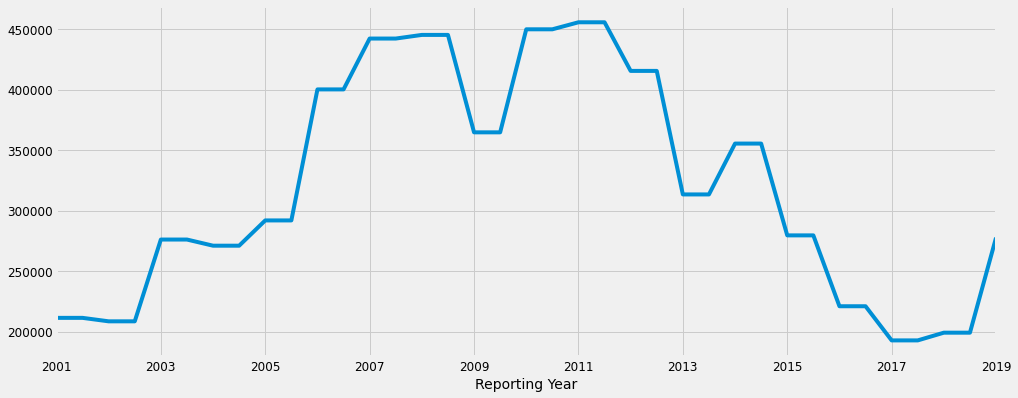

In [31]:
y.plot(figsize=(15, 6))
plt.show()

Since the data that we have has only the reporting year thus we can not see a seasonality and noise. 

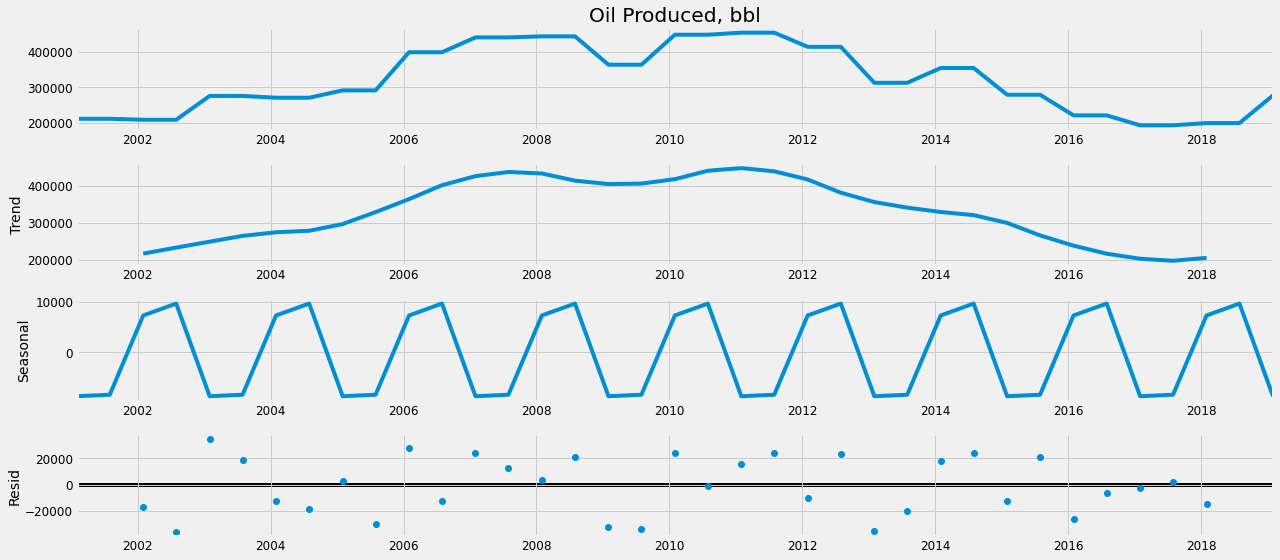

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1020.4283641625705
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1118635.590416448
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:650.1993155301177
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:317.32071923879283
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:676.1303226705567
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:633.1650366127565
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:344.3402729512604
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:318.8749310158841
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:970.2367934706284
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:929623.8037719881
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:605.5913654469227
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:288.6526157805504
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:691.7280110479093
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:638.1553023299424
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:352.08105338470506
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:290.4663379598852
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:846.8710246655723
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:551.6723497643366
ARIMA(0

The above output suggests that SARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of AIC:252.5960582350139. Therefore we should consider this to be optimal option.

In [35]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12))
                                #enforce_stationarity=False,
                                #enforce_invertibility=False
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0001   1.34e+05   9.97e-10      1.000   -2.63e+05    2.63e+05
ma.L1         -0.0001   1.46e+05  -8.49e-10      1.000   -2.86e+05    2.86e+05
ar.S.L12       0.0005      0.391      0.001      0.999      -0.765       0.766
ma.S.L12      -0.6579      0.638     -1.032      0.302      -1.908       0.592
sigma2      5.465e+09      3.330   1.64e+09      0.000    5.47e+09    5.47e+09


#### run model diagnostics to investigate any unusual behavior.

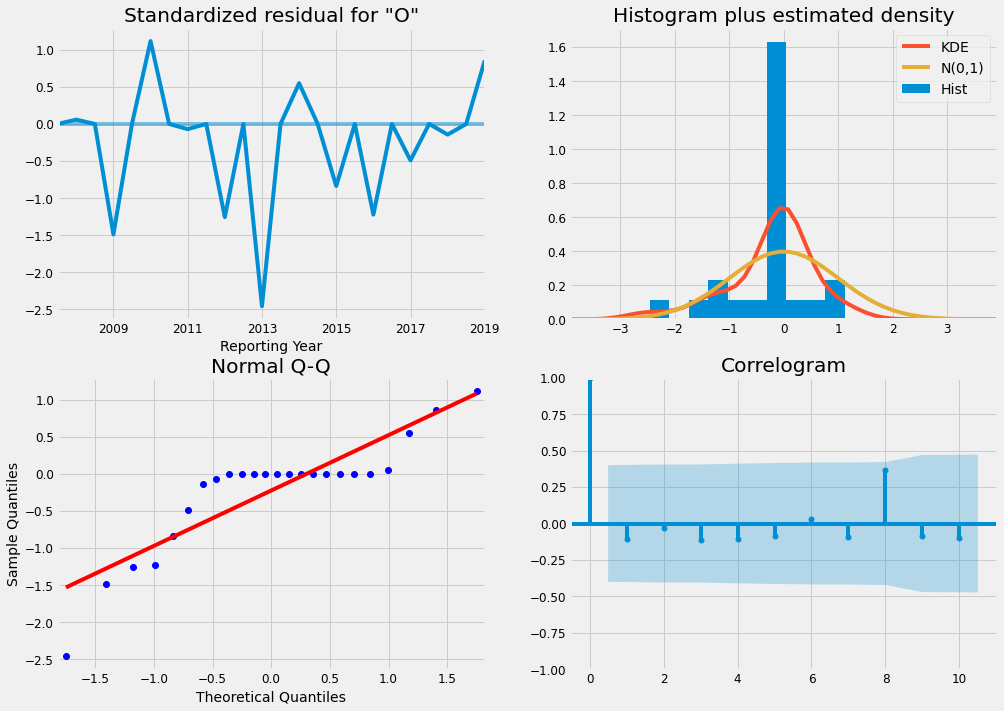

In [36]:
#run model diagnostics to investigate any unusual behavior.
results.plot_diagnostics(figsize=(15, 11))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed. similar trend was observed for Gas production.

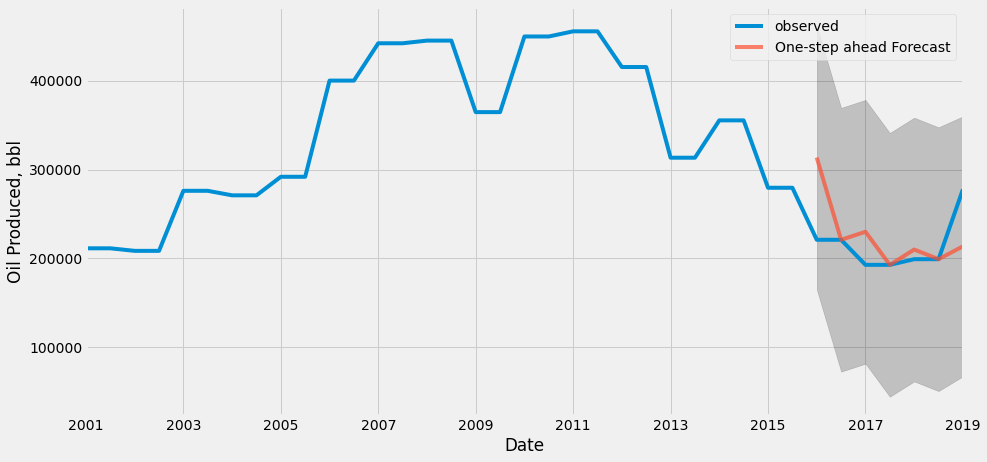

In [32]:
#Oil Produced, bbl
pred = results.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Produced, bbl')
plt.legend()
plt.show()

# Time series forecasting of (Gas Prodcution) in NY STATE using ARIMA model

In [33]:
#--------------------------Time series forecasting of Gas Prodcution in NY STATE using ARIMA model-------------------------------
data_timeseries_1 = data.groupby('Reporting Year')['Gas Produced, Mcf'].sum().reset_index()
data_timeseries_1 = data_timeseries_1.set_index('Reporting Year')
data_timeseries_1.index

DatetimeIndex(['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Reporting Year', freq=None)

In [34]:
y1 = data_timeseries_1['Gas Produced, Mcf'].resample('6M').mean()

In [35]:
y1 = y1.fillna(method='ffill')

In [36]:
y1

Reporting Year
2001-01-31    2.991767e+07
2001-07-31    2.991767e+07
2002-01-31    4.054656e+07
2002-07-31    4.054656e+07
2003-01-31    4.747564e+07
2003-07-31    4.747564e+07
2004-01-31    5.892336e+07
2004-07-31    5.892336e+07
2005-01-31    6.579599e+07
2005-07-31    6.579599e+07
2006-01-31    6.526052e+07
2006-07-31    6.526052e+07
2007-01-31    6.137593e+07
2007-07-31    6.137593e+07
2008-01-31    5.628880e+07
2008-07-31    5.628880e+07
2009-01-31    4.800415e+07
2009-07-31    4.800415e+07
2010-01-31    4.050006e+07
2010-07-31    4.050006e+07
2011-01-31    3.361285e+07
2011-07-31    3.361285e+07
2012-01-31    2.689585e+07
2012-07-31    2.689585e+07
2013-01-31    2.345827e+07
2013-07-31    2.345827e+07
2014-01-31    2.047191e+07
2014-07-31    2.047191e+07
2015-01-31    1.782859e+07
2015-07-31    1.782859e+07
2016-01-31    1.344554e+07
2016-07-31    1.344554e+07
2017-01-31    1.180929e+07
2017-07-31    1.180929e+07
2018-01-31    1.062254e+07
2018-07-31    1.062254e+07
2019-01-31   

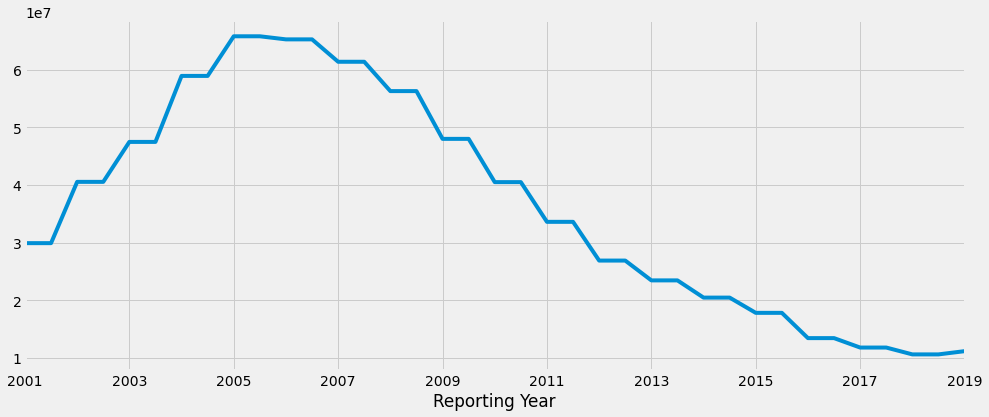

In [37]:
y1.plot(figsize=(15, 6))
plt.show()

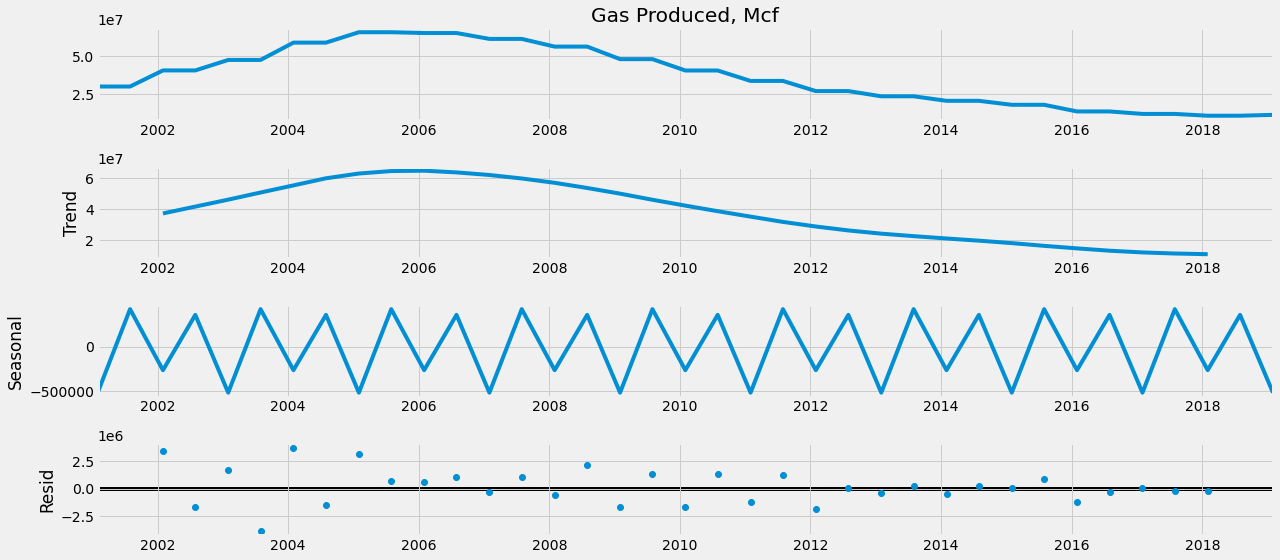

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decomposition.plot()
plt.show()

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1367.0416498038205
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:36578012260.372635
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:893.4625497142051
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:444.5478021610126
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:911.1110235929667
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:869.3232354528859
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:486.89980882223017
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:442.7309294091467
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1307.2672449448535
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:35682919914.35304
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:842.2269765912835
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:404.39348848197545
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:931.3231033319549
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:858.4693146466134
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:478.9328792420923
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:405.91094995469996
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1170.688634942647
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:759.5890160895667
ARIM

- The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of AIC:336.8147271072718. Therefore we should consider this to be optimal option.


In [41]:
mod_1 = sm.tsa.statespace.SARIMAX(y1,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12))
                                #enforce_stationarity=False,
                                #enforce_invertibility=False
results_1 = mod_1.fit()
print(results_1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -4.877e-06   9156.450  -5.33e-10      1.000   -1.79e+04    1.79e+04
ma.S.L12      -0.5781      0.244     -2.370      0.018      -1.056      -0.100
sigma2      3.535e+13   1.79e-06   1.97e+19      0.000    3.54e+13    3.54e+13


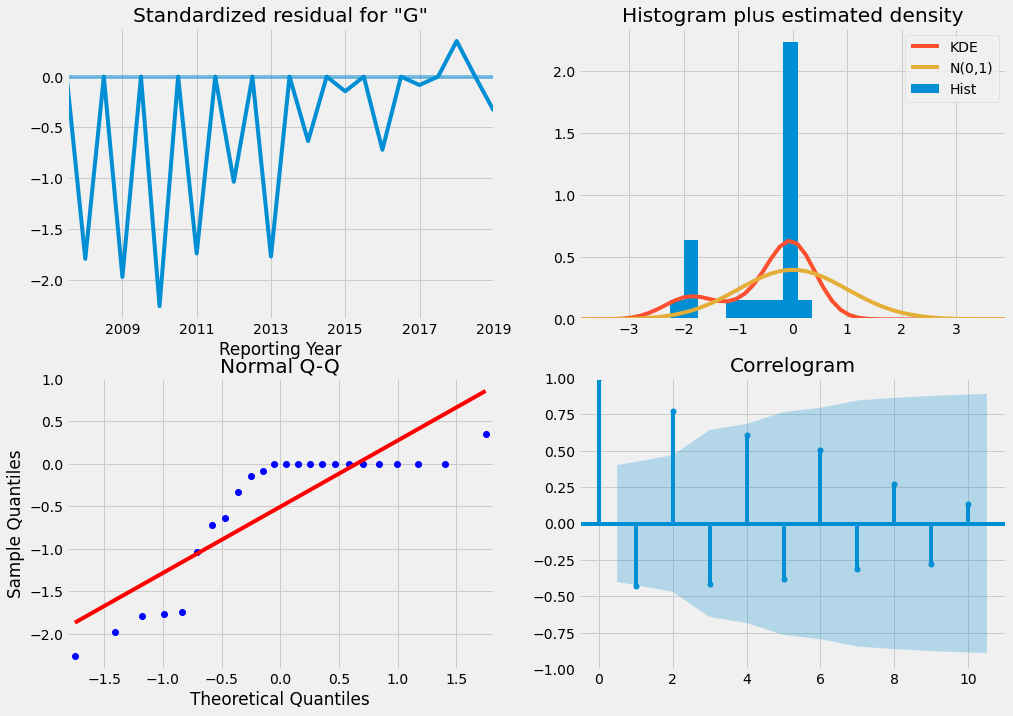

In [42]:
results_1.plot_diagnostics(figsize=(15, 11))
plt.show()

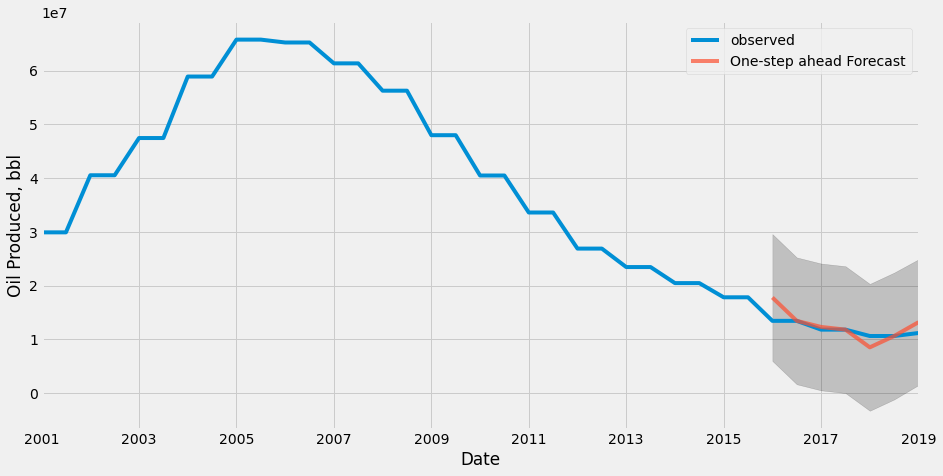

In [44]:
#gas production prediction using ARIMA
pred_1 = results_1.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred_1.conf_int()
ax = y1['2001':].plot(label='observed')
pred_1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Gas Produced, Mcf')
plt.title('Time series forecasting of Gas Prodcution in NY STATE')
plt.legend()
plt.show()

# Conclusion:

From our anlysis, we dig a level deeper into the world of Oil and gas commodity production. we got to learn about the terminologies involved and also understood some of the important facts like how NY state is contributing in the overall production of the united states Oil and Gas production. 
- In the recent years Oil and gas commodies have shown positive correlation between them. however, when we considered only a small part of USA (i.e. NY State), We could not verify the fact which we intend to analyse with our statistical analysis. we got a -0.0055 as a correlation value vetween the Oil and gas production
- Secondly, we tried to predict Oil and Gas production based o nthe data we had using One step ahead forecast, we got a pretty good results for it. 
- Surprising fact: We observed a positive correlation between gas and water production. which we intially did not intend to analyse but got as a result of our statistical analysis. 
- We also found that some of the counties which produced higher amount of Oil and Gas overall but now ranked on a bit lower position in the production. 
